 # Generative Adversarial Networks
 Even though the priority of this project is to correctly classify pokemon into their respective types, as and added bonus we would also like to try to generate new pokemons using Generative Adversarial Networks(GANs).
 
[Extended from Simple GAN](https://medium.com/datadriveninvestor/generative-adversarial-network-gan-using-keras-ce1c05cfdfd3)
 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
import gc
import cv2
import glob
from PIL import Image

### Work with new cleaner sprites Data, New method
Found here
[PokeAPI](https://github.com/PokeAPI/sprites)

In [15]:
#smart crop delete as much of the back background around each pokemon 
def smart_crop(im):
    top, down , left ,right = 0,im.shape[0],0,im.shape[0]
    while top < im.shape[0]:
            if((im[:top] == [0,0,0]).all()):
                top+=1
            else:
                top-=1
                break 
    while down > 0:
            if((im[down:] == [0,0,0]).all()):
                down-=1
            else:
                down+=1
                break
    while left < im.shape[0]:
            if((im[:,:left:] == [0,0,0]).all()):
                left+=1
            else:
                left-=1
                break 
    while right > 0:
            if((im[:,right::] == [0,0,0]).all()):
                right-=1
            else:
                right+=1
                break
    return top, down , left ,right 

In [16]:
# def flip_h(data):
#     #Flip images horizontally 
#     new_images = []
#     for i in range(data.shape[0]):
#         image = np.copy(data[i])
#         #change image background 
#         image = image[:, ::-1]
#         new_images.append(image)

#     new_images = np.array(new_images)
#     new_images = np.vstack((data, new_images))  
    
#     return new_images 


(7352, 64, 64, 3)


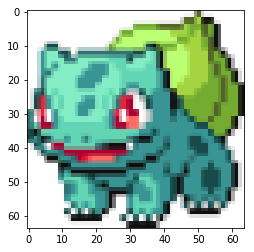

In [19]:
# fill_color = (0,0,0)
# pics = []
# for im_path in glob.glob("sprites-master/sprites/pokemon/Original/*.png"):
    
#     im = Image.open(im_path)
#     im = im.convert('RGBA')
#     if im.mode in ('RGBA', 'LA'):
#         background = Image.new(im.mode[:-1], im.size, fill_color)
#         background.paste(im, im.split()[-1]) # omit transparency
#         im = background
#     im = im.convert('RGB')
#     im = np.array(im)
#     top, down , left ,right = smart_crop(im)
#     #change image background to from black to white
#     im [np.all(im == [0,0,0], axis= 2)] = [255,255,255]
#     res = cv2.resize(im[top:down,left:right:], dsize=(64,64), interpolation=cv2.INTER_AREA)
#     pics.append(res)

# for im_path in glob.glob("sprites-master/sprites/pokemon/shiny/*.png"):
#     im = Image.open(im_path)
#     im = im.convert('RGBA')
#     if im.mode in ('RGBA', 'LA'):
#         background = Image.new(im.mode[:-1], im.size, fill_color)
#         background.paste(im, im.split()[-1]) # omit transparency
#         im = background
#     im = im.convert('RGB')
#     im = np.array(im)
#     top, down , left ,right = smart_crop(im)
#     #change image background to from black to white
#     im [np.all(im == [0,0,0], axis= 2)] = [255,255,255]
#     res = cv2.resize(im[top:down,left:right:], dsize=(64, 64), interpolation=cv2.INTER_AREA)
#     pics.append(res)

# for im_path in glob.glob("sprites-master/sprites/pokemon/shiny/female/*.png"):
#     im = Image.open(im_path)
#     im = im.convert('RGBA')
#     if im.mode in ('RGBA', 'LA'):
#         background = Image.new(im.mode[:-1], im.size, fill_color)
#         background.paste(im, im.split()[-1]) # omit transparency
#         im = background
#     im = im.convert('RGB')
#     im = np.array(im)
#     top, down , left ,right = smart_crop(im)
#     #change image background to from black to white
#     im [np.all(im == [0,0,0], axis= 2)] = [255,255,255]
#     res = cv2.resize(im[top:down,left:right:], dsize=(64, 64), interpolation=cv2.INTER_AREA)
#     pics.append(res)
    
# for im_path in glob.glob("sprites-master/sprites/pokemon/female/*.png"):
#     im = Image.open(im_path)
#     im = im.convert('RGBA')
#     if im.mode in ('RGBA', 'LA'):
#         background = Image.new(im.mode[:-1], im.size, fill_color)
#         background.paste(im, im.split()[-1]) # omit transparency
#         im = background
#     im = im.convert('RGB')
#     im = np.array(im)
#     top, down , left ,right = smart_crop(im)
#     #change image background to from black to white
#     im [np.all(im == [0,0,0], axis= 2)] = [255,255,255]
#     res = cv2.resize(im[top:down,left:right:], dsize=(64, 64), interpolation=cv2.INTER_AREA)
#     pics.append(res)
    
# for im_path in glob.glob("sprites-master/sprites/pokemon/model/*.png"):
#     im = Image.open(im_path)
#     im = im.convert('RGBA')
#     if im.mode in ('RGBA', 'LA'):
#         background = Image.new(im.mode[:-1], im.size, fill_color)
#         background.paste(im, im.split()[-1]) # omit transparency
#         im = background
#     im = im.convert('RGB')
#     im = np.array(im)
#     top, down , left ,right = smart_crop(im)
#     #change image background to from black to white
#     im [np.all(im == [0,0,0], axis= 2)] = [255,255,255]
#     res = cv2.resize(im[top:down,left:right:], dsize=(64, 64), interpolation=cv2.INTER_AREA)
#     pics.append(res)
    
# for im_path in glob.glob("sprites-master/sprites/pokemon/other-sprites/official-artwork/*.png"):
#     im = Image.open(im_path)
#     im = im.convert('RGBA')
#     if im.mode in ('RGBA', 'LA'):
#         background = Image.new(im.mode[:-1], im.size, fill_color)
#         background.paste(im, im.split()[-1]) # omit transparency
#         im = background
#     im = im.convert('RGB')
#     im = np.array(im)
#     top, down , left ,right = smart_crop(im)
#     #change image background to from black to white
#     im [np.all(im == [0,0,0], axis= 2)] = [255,255,255]
#     res = cv2.resize(im[top:down,left:right:], dsize=(64, 64), interpolation=cv2.INTER_AREA)
#     pics.append(res)
    
# pics = np.array(pics)

# pics = flip_h(pics)
# print(pics.shape)
# plt.imshow(pics[8])
# np.save("pokeGAN_Images_64x64.npy", pics)

### Down scale all images make training easier, Old method 

In [2]:
def down_scale(data):
    temp = []
    for i in range(data.shape[0]):
        img = data[i]
        res = cv2.resize(img, dsize=(64, 64), interpolation=cv2.INTER_AREA)
        temp.append(res)
        
    temp = np.array(temp)
    return temp


### Read in data only test on a single class 

In [3]:
def load_data_type():
    x_train = np.load("poke_train.npy")
    poke_labels = np.load("poke_lables.npy")
    name = x_train[:,1]
    y_train = x_train[:,2]  #index type
    x_train = np.array(x_train[:,0].tolist()).astype('uint8')
    type_select= []
    for i in range(x_train.shape[0]):
        if 'Pika' in name[i] or 'Pichu' in name[i] or 'Minun' in name[i] or 'Plusle' in name[i]:
            type_select.append(x_train[i])
#         if "electric" in poke_labels[y_train[i]]:
#             type_select.append(x_train[i])

    x_train = np.array(type_select)
    x_train = down_scale(x_train)
    x_train = (x_train.astype('float32')- 127.5) / 127.5
    return x_train

# x = load_data_type()

# print(x.shape)

In [4]:
# def load_data():
#     x_train = np.load("pokeGAN_Images_64x64.npy")
# #     x_train = np.array(x_train.tolist()).astype('uint8')
#     x_train = (x_train.astype('float32')- 127.5) / 127.5
#     return x_train

# x = load_data()

# print(x.shape)

In [5]:
def adam_optimizer():
    #suggested in DCGAN Paper
    return tf.keras.optimizers.Adam(lr=0.0002, beta_1=0.5)

In [3]:
def create_generator():
    dim = 4
    depth = 1024
    init = tf.keras.initializers.RandomNormal(stddev=0.02)
    
    generator = tf.keras.Sequential()

    generator.add(tf.keras.layers.Dense(dim*dim*depth, input_shape=(100,), kernel_initializer=init, activation = 'relu'))
    generator.add(tf.keras.layers.Reshape((dim, dim, depth)))
    generator.add(tf.keras.layers.BatchNormalization())
#     generator.add(tf.keras.layers.LeakyReLU(0.2))

    generator.add(tf.keras.layers.Conv2DTranspose(int(depth/2), kernel_size=(5,5), strides=2, padding='same', activation = 'relu'))
    generator.add(tf.keras.layers.BatchNormalization())
#     generator.add(tf.keras.layers.LeakyReLU(0.2))


    generator.add(tf.keras.layers.Conv2DTranspose(int(depth/4), kernel_size=(5,5), strides=2, padding='same', activation = 'relu'))
    generator.add(tf.keras.layers.BatchNormalization())
#     generator.add(tf.keras.layers.LeakyReLU(0.2))


    generator.add(tf.keras.layers.Conv2DTranspose(int(depth/8), kernel_size=(5,5), strides=2, padding='same', activation = 'relu'))
    generator.add(tf.keras.layers.BatchNormalization())
#     generator.add(tf.keras.layers.LeakyReLU(0.2))

    generator.add(tf.keras.layers.Conv2DTranspose(3, kernel_size=(5,5), strides=2, padding='same',activation='tanh'))
        
    #generator.compile(tf.keras.optimizers.Adam(lr=0.0004, beta_1=0.5), loss='binary_crossentropy',metrics=['binary_accuracy'])
    return generator

g=create_generator()
g.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16384)             1654784   
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 1024)        0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 4, 4, 1024)        4096      
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 8, 8, 512)         13107712  
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 8, 8, 512)         2048      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 16, 16, 256)       3277056   
_________________________________________________________________
batc

In [7]:
def create_discriminator():
    
    init = tf.keras.initializers.RandomNormal(stddev=0.02)
    discriminator = tf.keras.Sequential()

    depth = 128
    discriminator.add(tf.keras.layers.Conv2D(depth, kernel_size=(5,5), strides=2, padding='same',input_shape=(64,64,3), kernel_initializer=init))
    discriminator.add(tf.keras.layers.LeakyReLU(0.2))


    discriminator.add(tf.keras.layers.Conv2D(depth*2, kernel_size=(5,5), strides=2, padding='same'))
    discriminator.add(tf.keras.layers.BatchNormalization())
    discriminator.add(tf.keras.layers.LeakyReLU(0.2))

    
    discriminator.add(tf.keras.layers.Conv2D(depth*4, kernel_size=(5,5), strides=2, padding='same'))
    discriminator.add(tf.keras.layers.BatchNormalization())
    discriminator.add(tf.keras.layers.LeakyReLU(0.2))

    
    discriminator.add(tf.keras.layers.Conv2D(depth*8, kernel_size=(5,5), strides=2, padding='same'))
    discriminator.add(tf.keras.layers.BatchNormalization())
    discriminator.add(tf.keras.layers.LeakyReLU(0.2))

   
    discriminator.add(tf.keras.layers.Flatten())

    
    discriminator.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
#     discriminator.compile(tf.keras.optimizers.Adam(lr=0.0003, beta_1=0.5), loss='binary_crossentropy')
    discriminator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return discriminator

d =create_discriminator()
d.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 128)       9728      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 256)       819456    
_________________________________________________________________
batch_normalization_v1_4 (Ba (None, 16, 16, 256)       1024      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 512)         3277312   
_________________________________________________________________
batch_normalization_v1_5 (Ba (None, 8, 8, 512)         2048      
__________

In [8]:
def create_gan(discriminator, generator):
    discriminator.trainable=False
    gan_input = tf.keras.layers.Input(shape=(100,))
    img = generator(gan_input)
    gan_output= discriminator(img)
    gan= tf.keras.Model(inputs=gan_input, outputs=gan_output)
#     gan.compile(tf.keras.optimizers.Adam(lr=0.0004, beta_1=0.5), loss='binary_crossentropy')
    gan.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return gan

gan = create_gan(d,g)
gan.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential (Sequential)      (None, 64, 64, 3)         18876163  
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 17238273  
Total params: 36,114,436
Trainable params: 18,872,323
Non-trainable params: 17,242,113
_________________________________________________________________


In [9]:
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(60,60)):
    plt.ioff()
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(100,64,64,3)
    fig = plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        img = (generated_images[i]*127.5 + 127.5).astype('uint8')
        plt.imshow(img)
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('GAN/gan_generated_pokemos-%d.png' %epoch,bbox_inches='tight')
    plt.close(fig)

In [11]:
def training(epochs=1, batch_size=128):
    
    
    X_train = load_data_type()
    batch_count = X_train.shape[0] / batch_size
    
    # Creating GAN
    generator= create_generator()
#     generator = tf.keras.models.load_model('generator_model.h5')
    discriminator= create_discriminator()
    gan = create_gan(discriminator, generator)
    for e in range(1,epochs+1 ):
        print("Epoch %d" %e)
        d_loss = 0
        gan_loss = 0
        for _ in tqdm(range(batch_size)):
            real = np.random.uniform(0,.1, batch_size)
            fake = np.random.uniform(.9,1, batch_size)
            #generate  random noise as an input  to  initialize the  generator
            noise= np.random.normal(0,1, [batch_size,100])

            # Pre train discriminator on  fake and real data  before starting the gan.
            discriminator.trainable=True
            # Train on real input 
            # Get a random set of  real images
            image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
            dl_real = discriminator.train_on_batch(image_batch, real)
            
            # Train on fake input 
            # Construct different batches of  real and fake data \
            generated_images = generator.predict(noise)
            dl_fake = discriminator.train_on_batch(generated_images,fake)
            
            # Labels for generated and real data
            y_dis=np.zeros(2*batch_size)
            y_dis[:batch_size]=.9
            d_loss += 0.5 * (dl_real + dl_fake)
            
            #Tricking the noised input of the Generator as real data
            noise= np.random.normal(0,1, [batch_size, 100])
            target = np.ones(batch_size)
            
            # During the training of gan, 
            # the weights of discriminator should be fixed. 
            #We can enforce that by setting the trainable flag
            discriminator.trainable=False
            
            #training  the GAN by alternating the training of the Discriminator 
            #and training the chained GAN model with Discriminator’s weights freezed.
            gl = gan.train_on_batch(noise, target)
            gan_loss += gl
            
        print('(gan_loss=%g) (D_loss=%g) ' % (gan_loss/batch_size,  d_loss/batch_size)) 
#         if(gan_loss > 16.118):
#             return False;
        if e == 1 or e % 5 == 0:
            generator.save('Generators/generator_model-%d.h5' %e)
            plot_generated_images(e, generator)
    return True
            
result = training(10000,128)

  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 1
Instructions for updating:
Use tf.cast instead.


100%|██████████| 128/128 [02:13<00:00,  1.01it/s]


(gan_loss=1.20919) (D_loss=0.968539) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 2


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=1.02296) (D_loss=0.830646) 
Epoch 3


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=0.212986) (D_loss=0.806181) 
Epoch 4


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.71107) (D_loss=0.818778) 
Epoch 5


100%|██████████| 128/128 [02:03<00:00,  1.05it/s]


(gan_loss=15.1413) (D_loss=0.797637) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 6


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=15.145) (D_loss=0.798897) 
Epoch 7


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=15.1441) (D_loss=0.79846) 
Epoch 8


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=15.147) (D_loss=0.800237) 
Epoch 9


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=15.1427) (D_loss=0.802812) 
Epoch 10


100%|██████████| 128/128 [02:03<00:00,  1.04it/s]


(gan_loss=15.1434) (D_loss=0.782801) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 11


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=15.1392) (D_loss=0.521167) 
Epoch 12


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=15.1454) (D_loss=0.505397) 
Epoch 13


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=15.1495) (D_loss=0.503595) 
Epoch 14


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=11.369) (D_loss=0.614093) 
Epoch 15


100%|██████████| 128/128 [02:07<00:00,  1.00it/s]


(gan_loss=1.57928) (D_loss=0.330925) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 16


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.11257) (D_loss=0.505768) 
Epoch 17


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.36628) (D_loss=0.597576) 
Epoch 18


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.19518) (D_loss=0.390337) 
Epoch 19


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=1.42834) (D_loss=0.346988) 
Epoch 20


100%|██████████| 128/128 [02:07<00:00,  1.00it/s]


(gan_loss=2.95964) (D_loss=0.482717) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 21


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.63037) (D_loss=0.39851) 
Epoch 22


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=0.947653) (D_loss=0.277155) 
Epoch 23


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.40733) (D_loss=0.32352) 
Epoch 24


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=1.99027) (D_loss=0.328888) 
Epoch 25


100%|██████████| 128/128 [02:07<00:00,  1.01it/s]


(gan_loss=1.8169) (D_loss=0.304356) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 26


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.30723) (D_loss=0.370199) 
Epoch 27


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.39004) (D_loss=0.389133) 
Epoch 28


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.6149) (D_loss=0.342731) 
Epoch 29


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.93409) (D_loss=0.336395) 
Epoch 30


100%|██████████| 128/128 [02:07<00:00,  1.00it/s]


(gan_loss=3.82716) (D_loss=0.295282) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 31


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.83791) (D_loss=0.286896) 
Epoch 32


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.9377) (D_loss=0.26559) 
Epoch 33


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.87047) (D_loss=0.402824) 
Epoch 34


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.67506) (D_loss=0.254704) 
Epoch 35


100%|██████████| 128/128 [02:07<00:00,  1.00it/s]


(gan_loss=3.63012) (D_loss=0.238953) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 36


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.57156) (D_loss=0.280358) 
Epoch 37


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.80738) (D_loss=0.28152) 
Epoch 38


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.53124) (D_loss=0.230198) 
Epoch 39


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.63283) (D_loss=0.26301) 
Epoch 40


100%|██████████| 128/128 [02:09<00:00,  1.00s/it]


(gan_loss=3.77937) (D_loss=0.259922) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 41


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.32928) (D_loss=0.222191) 
Epoch 42


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.71748) (D_loss=0.347713) 
Epoch 43


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.44525) (D_loss=0.232656) 
Epoch 44


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.29152) (D_loss=0.220229) 
Epoch 45


100%|██████████| 128/128 [02:08<00:00,  1.00s/it]


(gan_loss=3.75842) (D_loss=0.292738) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 46


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.34473) (D_loss=0.227765) 
Epoch 47


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.29378) (D_loss=0.222551) 
Epoch 48


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.29655) (D_loss=0.21822) 
Epoch 49


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.6039) (D_loss=0.327672) 
Epoch 50


100%|██████████| 128/128 [02:07<00:00,  1.01it/s]


(gan_loss=2.87855) (D_loss=0.234999) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 51


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.9654) (D_loss=0.223237) 
Epoch 52


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.03955) (D_loss=0.225935) 
Epoch 53


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.14096) (D_loss=0.223207) 
Epoch 54


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.86128) (D_loss=0.278972) 
Epoch 55


100%|██████████| 128/128 [02:10<00:00,  1.00s/it]


(gan_loss=3.27962) (D_loss=0.228323) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 56


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.00102) (D_loss=0.221067) 
Epoch 57


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.07327) (D_loss=0.222178) 
Epoch 58


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.14404) (D_loss=0.22294) 
Epoch 59


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.62063) (D_loss=0.238651) 
Epoch 60


100%|██████████| 128/128 [02:08<00:00,  1.01it/s]


(gan_loss=3.21408) (D_loss=0.221663) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 61


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.60684) (D_loss=0.26739) 
Epoch 62


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.9086) (D_loss=0.227844) 
Epoch 63


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.90955) (D_loss=0.225485) 
Epoch 64


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.83822) (D_loss=0.218444) 
Epoch 65


100%|██████████| 128/128 [02:09<00:00,  1.00s/it]


(gan_loss=3.5197) (D_loss=0.266433) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 66


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.98443) (D_loss=0.226608) 
Epoch 67


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.96102) (D_loss=0.220299) 
Epoch 68


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.72378) (D_loss=0.261254) 
Epoch 69


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.85913) (D_loss=0.216427) 
Epoch 70


100%|██████████| 128/128 [02:09<00:00,  1.00s/it]


(gan_loss=3.31813) (D_loss=0.24593) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 71


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.6671) (D_loss=0.215448) 
Epoch 72


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.08802) (D_loss=0.220029) 
Epoch 73


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.85297) (D_loss=0.269159) 
Epoch 74


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.987) (D_loss=0.220422) 
Epoch 75


100%|██████████| 128/128 [02:07<00:00,  1.01it/s]


(gan_loss=3.01451) (D_loss=0.218835) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 76


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.06343) (D_loss=0.219716) 
Epoch 77


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.15996) (D_loss=0.218036) 
Epoch 78


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.4298) (D_loss=0.242076) 
Epoch 79


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.10491) (D_loss=0.219751) 
Epoch 80


100%|██████████| 128/128 [02:06<00:00,  1.01it/s]


(gan_loss=3.05513) (D_loss=0.214924) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 81


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.16374) (D_loss=0.220469) 
Epoch 82


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.70578) (D_loss=0.264288) 
Epoch 83


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.87758) (D_loss=0.21596) 
Epoch 84


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.09803) (D_loss=0.220468) 
Epoch 85


100%|██████████| 128/128 [02:11<00:00,  1.06s/it]


(gan_loss=2.97085) (D_loss=0.217123) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 86


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.08646) (D_loss=0.221687) 
Epoch 87


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.09835) (D_loss=0.217193) 
Epoch 88


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.16263) (D_loss=0.217096) 
Epoch 89


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.09529) (D_loss=0.216923) 
Epoch 90


100%|██████████| 128/128 [02:06<00:00,  1.01it/s]


(gan_loss=3.14118) (D_loss=0.21735) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 91


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.04136) (D_loss=0.212426) 
Epoch 92


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.46114) (D_loss=0.230859) 
Epoch 93


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.22198) (D_loss=0.226237) 
Epoch 94


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.00023) (D_loss=0.212711) 
Epoch 95


100%|██████████| 128/128 [02:06<00:00,  1.01it/s]


(gan_loss=3.13669) (D_loss=0.220011) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 96


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.09621) (D_loss=0.215247) 
Epoch 97


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.08872) (D_loss=0.215189) 
Epoch 98


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.04323) (D_loss=0.214662) 
Epoch 99


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.95668) (D_loss=0.211452) 
Epoch 100


100%|██████████| 128/128 [02:06<00:00,  1.02it/s]


(gan_loss=3.14534) (D_loss=0.219914) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 101


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.0669) (D_loss=0.214422) 
Epoch 102


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.49361) (D_loss=0.258814) 
Epoch 103


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=1.31607) (D_loss=0.211625) 
Epoch 104


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.62326) (D_loss=0.211383) 
Epoch 105


100%|██████████| 128/128 [02:08<00:00,  1.01it/s]


(gan_loss=2.95033) (D_loss=0.213024) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 106


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.90144) (D_loss=0.214398) 
Epoch 107


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.38974) (D_loss=0.243959) 
Epoch 108


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.87325) (D_loss=0.219347) 
Epoch 109


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.82821) (D_loss=0.210842) 
Epoch 110


100%|██████████| 128/128 [02:09<00:00,  1.01it/s]


(gan_loss=3.04409) (D_loss=0.213248) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 111


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.94296) (D_loss=0.211236) 
Epoch 112


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.95793) (D_loss=0.21021) 
Epoch 113


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.95019) (D_loss=0.210927) 
Epoch 114


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.25454) (D_loss=0.221206) 
Epoch 115


100%|██████████| 128/128 [02:07<00:00,  1.00it/s]


(gan_loss=3.06403) (D_loss=0.225419) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 116


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.79411) (D_loss=0.210802) 
Epoch 117


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.80798) (D_loss=0.207) 
Epoch 118


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.94036) (D_loss=0.213089) 
Epoch 119


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.97769) (D_loss=0.211792) 
Epoch 120


100%|██████████| 128/128 [02:07<00:00,  1.01it/s]


(gan_loss=2.95364) (D_loss=0.208606) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 121


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.9478) (D_loss=0.210735) 
Epoch 122


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.90531) (D_loss=0.209322) 
Epoch 123


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.93768) (D_loss=0.211425) 
Epoch 124


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.90735) (D_loss=0.212782) 
Epoch 125


100%|██████████| 128/128 [02:06<00:00,  1.01it/s]


(gan_loss=2.98586) (D_loss=0.210511) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 126


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=3.01155) (D_loss=0.224211) 
Epoch 127


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.79402) (D_loss=0.212517) 
Epoch 128


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.83819) (D_loss=0.211929) 
Epoch 129


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.8206) (D_loss=0.2072) 
Epoch 130


100%|██████████| 128/128 [02:06<00:00,  1.01it/s]


(gan_loss=2.90335) (D_loss=0.21073) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 131


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.85737) (D_loss=0.208491) 
Epoch 132


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.90074) (D_loss=0.207225) 
Epoch 133


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.88291) (D_loss=0.206936) 
Epoch 134


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.93862) (D_loss=0.222213) 
Epoch 135


100%|██████████| 128/128 [02:07<00:00,  1.01it/s]


(gan_loss=2.7617) (D_loss=0.206292) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 136


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.86982) (D_loss=0.207614) 
Epoch 137


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.91325) (D_loss=0.212739) 
Epoch 138


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.84704) (D_loss=0.209556) 
Epoch 139


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.86168) (D_loss=0.207056) 
Epoch 140


100%|██████████| 128/128 [02:06<00:00,  1.02it/s]


(gan_loss=2.91779) (D_loss=0.208554) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 141


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.77802) (D_loss=0.207539) 
Epoch 142


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.85043) (D_loss=0.208658) 
Epoch 143


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.83241) (D_loss=0.208556) 
Epoch 144


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.66401) (D_loss=0.253798) 
Epoch 145


100%|██████████| 128/128 [02:07<00:00,  1.01it/s]


(gan_loss=2.41842) (D_loss=0.214374) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 146


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.32453) (D_loss=0.208539) 
Epoch 147


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.56782) (D_loss=0.206607) 
Epoch 148


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.59296) (D_loss=0.206267) 
Epoch 149


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.73734) (D_loss=0.206581) 
Epoch 150


100%|██████████| 128/128 [02:06<00:00,  1.02it/s]


(gan_loss=2.63768) (D_loss=0.204786) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 151


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.77258) (D_loss=0.207618) 
Epoch 152


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.81709) (D_loss=0.205514) 
Epoch 153


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.76066) (D_loss=0.206402) 
Epoch 154


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.79278) (D_loss=0.20738) 
Epoch 155


100%|██████████| 128/128 [02:06<00:00,  1.01it/s]


(gan_loss=2.75444) (D_loss=0.208412) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 156


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.68525) (D_loss=0.206754) 
Epoch 157


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.76578) (D_loss=0.205373) 
Epoch 158


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.8266) (D_loss=0.206725) 
Epoch 159


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.7939) (D_loss=0.205957) 
Epoch 160


100%|██████████| 128/128 [02:06<00:00,  1.02it/s]


(gan_loss=2.78955) (D_loss=0.205549) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 161


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.75365) (D_loss=0.207248) 
Epoch 162


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.75854) (D_loss=0.206345) 
Epoch 163


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.84089) (D_loss=0.206764) 
Epoch 164


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.92333) (D_loss=0.210994) 
Epoch 165


100%|██████████| 128/128 [02:06<00:00,  1.02it/s]


(gan_loss=2.71511) (D_loss=0.205365) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 166


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.81706) (D_loss=0.207954) 
Epoch 167


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.58069) (D_loss=0.20549) 
Epoch 168


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.76249) (D_loss=0.205066) 
Epoch 169


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.84905) (D_loss=0.207153) 
Epoch 170


100%|██████████| 128/128 [02:06<00:00,  1.01it/s]


(gan_loss=2.79891) (D_loss=0.208051) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 171


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.75671) (D_loss=0.20599) 
Epoch 172


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.72535) (D_loss=0.204361) 
Epoch 173


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.69711) (D_loss=0.207354) 
Epoch 174


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.70361) (D_loss=0.205674) 
Epoch 175


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.79561) (D_loss=0.215825) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 176


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.4075) (D_loss=0.204865) 
Epoch 177


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.59181) (D_loss=0.203649) 
Epoch 178


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.34097) (D_loss=0.204563) 
Epoch 179


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.582) (D_loss=0.204897) 
Epoch 180


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.70437) (D_loss=0.205218) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 181


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.91271) (D_loss=0.212655) 
Epoch 182


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.64776) (D_loss=0.204816) 
Epoch 183


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.22904) (D_loss=0.203919) 
Epoch 184


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.57583) (D_loss=0.203345) 
Epoch 185


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.75841) (D_loss=0.205615) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 186


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.676) (D_loss=0.206438) 
Epoch 187


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.35588) (D_loss=0.204595) 
Epoch 188


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.09397) (D_loss=0.206804) 
Epoch 189


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.41347) (D_loss=0.204861) 
Epoch 190


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.60122) (D_loss=0.206244) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 191


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.50199) (D_loss=0.203646) 
Epoch 192


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.36408) (D_loss=0.203512) 
Epoch 193


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.58592) (D_loss=0.204452) 
Epoch 194


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.70757) (D_loss=0.203347) 
Epoch 195


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.72951) (D_loss=0.206465) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 196


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.61128) (D_loss=0.20423) 
Epoch 197


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.71893) (D_loss=0.204585) 
Epoch 198


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.55725) (D_loss=0.203831) 
Epoch 199


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.52276) (D_loss=0.204353) 
Epoch 200


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.72781) (D_loss=0.204681) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 201


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.55077) (D_loss=0.208052) 
Epoch 202


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.51444) (D_loss=0.206771) 
Epoch 203


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.41246) (D_loss=0.204194) 
Epoch 204


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.53471) (D_loss=0.203675) 
Epoch 205


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.62942) (D_loss=0.203265) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 206


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.66262) (D_loss=0.203333) 
Epoch 207


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.62125) (D_loss=0.202806) 
Epoch 208


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.65875) (D_loss=0.20358) 
Epoch 209


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.83697) (D_loss=0.227294) 
Epoch 210


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.27405) (D_loss=0.204367) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 211


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.43977) (D_loss=0.20414) 
Epoch 212


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.40139) (D_loss=0.202572) 
Epoch 213


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.46758) (D_loss=0.202387) 
Epoch 214


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.51011) (D_loss=0.203089) 
Epoch 215


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.56845) (D_loss=0.202402) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 216


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.63242) (D_loss=0.201947) 
Epoch 217


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.66165) (D_loss=0.203271) 
Epoch 218


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.49736) (D_loss=0.202807) 
Epoch 219


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.57362) (D_loss=0.202512) 
Epoch 220


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.63157) (D_loss=0.203462) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 221


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.72562) (D_loss=0.204676) 
Epoch 222


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.64523) (D_loss=0.203097) 
Epoch 223


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.7626) (D_loss=0.207315) 
Epoch 224


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=1.81422) (D_loss=0.204218) 
Epoch 225


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.46725) (D_loss=0.203962) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 226


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.62071) (D_loss=0.203722) 
Epoch 227


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.73) (D_loss=0.204504) 
Epoch 228


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.67973) (D_loss=0.203915) 
Epoch 229


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.60791) (D_loss=0.202548) 
Epoch 230


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.6147) (D_loss=0.201927) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 231


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.65112) (D_loss=0.203284) 
Epoch 232


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.69203) (D_loss=0.202391) 
Epoch 233


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.6883) (D_loss=0.202092) 
Epoch 234


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.71546) (D_loss=0.202717) 
Epoch 235


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.69056) (D_loss=0.202638) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 236


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.46016) (D_loss=0.205918) 
Epoch 237


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.55379) (D_loss=0.201865) 
Epoch 238


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=1.97722) (D_loss=0.223416) 
Epoch 239


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=1.52051) (D_loss=0.202434) 
Epoch 240


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.10338) (D_loss=0.202676) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 241


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.26959) (D_loss=0.201342) 
Epoch 242


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.39327) (D_loss=0.201177) 
Epoch 243


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.58316) (D_loss=0.202561) 
Epoch 244


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.55889) (D_loss=0.203234) 
Epoch 245


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.53387) (D_loss=0.202876) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 246


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.63068) (D_loss=0.20296) 
Epoch 247


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.62839) (D_loss=0.202307) 
Epoch 248


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.6834) (D_loss=0.211635) 
Epoch 249


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.36119) (D_loss=0.202532) 
Epoch 250


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.56127) (D_loss=0.204025) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 251


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.08393) (D_loss=0.203752) 
Epoch 252


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.41596) (D_loss=0.202189) 
Epoch 253


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.75754) (D_loss=0.205955) 
Epoch 254


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.41198) (D_loss=0.205681) 
Epoch 255


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.48355) (D_loss=0.203617) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 256


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.54204) (D_loss=0.205307) 
Epoch 257


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.4389) (D_loss=0.20299) 
Epoch 258


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.4733) (D_loss=0.20181) 
Epoch 259


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.48836) (D_loss=0.202132) 
Epoch 260


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.55856) (D_loss=0.201633) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 261


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.64999) (D_loss=0.207487) 
Epoch 262


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.48779) (D_loss=0.203608) 
Epoch 263


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.49268) (D_loss=0.20288) 
Epoch 264


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.58992) (D_loss=0.201459) 
Epoch 265


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.71999) (D_loss=0.204056) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 266


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.63852) (D_loss=0.20177) 
Epoch 267


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.6965) (D_loss=0.202101) 
Epoch 268


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.73081) (D_loss=0.203402) 
Epoch 269


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.62674) (D_loss=0.202666) 
Epoch 270


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.57262) (D_loss=0.201633) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 271


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.6227) (D_loss=0.203214) 
Epoch 272


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.6835) (D_loss=0.202614) 
Epoch 273


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.67495) (D_loss=0.201151) 
Epoch 274


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.65336) (D_loss=0.200434) 
Epoch 275


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.58455) (D_loss=0.20182) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 276


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.83568) (D_loss=0.211484) 
Epoch 277


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=1.80737) (D_loss=0.205866) 
Epoch 278


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=1.86194) (D_loss=0.202022) 
Epoch 279


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.19969) (D_loss=0.201969) 
Epoch 280


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.52373) (D_loss=0.201412) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 281


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.5692) (D_loss=0.203272) 
Epoch 282


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.58496) (D_loss=0.202898) 
Epoch 283


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.56098) (D_loss=0.202516) 
Epoch 284


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.63274) (D_loss=0.200893) 
Epoch 285


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.67555) (D_loss=0.202966) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 286


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.5552) (D_loss=0.201578) 
Epoch 287


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.65633) (D_loss=0.200582) 
Epoch 288


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.56441) (D_loss=0.203906) 
Epoch 289


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.5804) (D_loss=0.201232) 
Epoch 290


100%|██████████| 128/128 [02:05<00:00,  1.03it/s]


(gan_loss=2.57411) (D_loss=0.202307) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 291


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.53085) (D_loss=0.202325) 
Epoch 292


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.57896) (D_loss=0.201399) 
Epoch 293


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.65052) (D_loss=0.204396) 
Epoch 294


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.34193) (D_loss=0.202204) 
Epoch 295


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.4723) (D_loss=0.202511) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 296


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.61864) (D_loss=0.201197) 
Epoch 297


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.59151) (D_loss=0.202391) 
Epoch 298


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.63634) (D_loss=0.2028) 
Epoch 299


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.69797) (D_loss=0.202949) 
Epoch 300


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.55356) (D_loss=0.205374) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 301


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.45867) (D_loss=0.202875) 
Epoch 302


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.57709) (D_loss=0.201034) 
Epoch 303


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.69218) (D_loss=0.201734) 
Epoch 304


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.59743) (D_loss=0.201114) 
Epoch 305


100%|██████████| 128/128 [02:05<00:00,  1.03it/s]


(gan_loss=2.63041) (D_loss=0.200115) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 306


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.59957) (D_loss=0.201382) 
Epoch 307


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.54491) (D_loss=0.202191) 
Epoch 308


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.42356) (D_loss=0.202835) 
Epoch 309


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.49198) (D_loss=0.200621) 
Epoch 310


100%|██████████| 128/128 [02:05<00:00,  1.03it/s]


(gan_loss=2.58383) (D_loss=0.201532) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 311


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.59885) (D_loss=0.199893) 
Epoch 312


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.48656) (D_loss=0.212601) 
Epoch 313


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=1.88059) (D_loss=0.201553) 
Epoch 314


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=1.87482) (D_loss=0.200643) 
Epoch 315


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.48556) (D_loss=0.200405) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 316


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.54876) (D_loss=0.201562) 
Epoch 317


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.4742) (D_loss=0.208166) 
Epoch 318


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.34429) (D_loss=0.204717) 
Epoch 319


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=1.95428) (D_loss=0.201765) 
Epoch 320


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.51869) (D_loss=0.201106) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 321


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.46112) (D_loss=0.201414) 
Epoch 322


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.46915) (D_loss=0.202602) 
Epoch 323


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.21931) (D_loss=0.202373) 
Epoch 324


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.24232) (D_loss=0.202068) 
Epoch 325


100%|██████████| 128/128 [02:04<00:00,  1.02it/s]


(gan_loss=2.49371) (D_loss=0.201386) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 326


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.49861) (D_loss=0.201313) 
Epoch 327


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.55364) (D_loss=0.200191) 
Epoch 328


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.491) (D_loss=0.201783) 
Epoch 329


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.56296) (D_loss=0.201091) 
Epoch 330


100%|██████████| 128/128 [02:04<00:00,  1.02it/s]


(gan_loss=2.03302) (D_loss=0.21716) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 331


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=1.50514) (D_loss=0.202047) 
Epoch 332


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=1.74255) (D_loss=0.200569) 
Epoch 333


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.3157) (D_loss=0.201576) 
Epoch 334


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.3826) (D_loss=0.201179) 
Epoch 335


100%|██████████| 128/128 [02:04<00:00,  1.02it/s]


(gan_loss=2.4443) (D_loss=0.200629) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 336


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.61077) (D_loss=0.203958) 
Epoch 337


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.3245) (D_loss=0.201024) 
Epoch 338


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.53317) (D_loss=0.201271) 
Epoch 339


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.31234) (D_loss=0.201038) 
Epoch 340


100%|██████████| 128/128 [02:04<00:00,  1.03it/s]


(gan_loss=2.48508) (D_loss=0.201153) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 341


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.5489) (D_loss=0.202058) 
Epoch 342


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.59739) (D_loss=0.200276) 
Epoch 343


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.53996) (D_loss=0.202239) 
Epoch 344


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.55816) (D_loss=0.204871) 
Epoch 345


100%|██████████| 128/128 [02:09<00:00,  1.01s/it]


(gan_loss=2.36203) (D_loss=0.200893) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 346


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.43412) (D_loss=0.200803) 
Epoch 347


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.71633) (D_loss=0.202344) 
Epoch 348


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.60913) (D_loss=0.20165) 
Epoch 349


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.58757) (D_loss=0.201159) 
Epoch 350


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.54166) (D_loss=0.201967) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 351


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.53697) (D_loss=0.200917) 
Epoch 352


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.58685) (D_loss=0.203905) 
Epoch 353


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.57117) (D_loss=0.200907) 
Epoch 354


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.5931) (D_loss=0.205029) 
Epoch 355


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.43879) (D_loss=0.201935) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 356


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.45103) (D_loss=0.201138) 
Epoch 357


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.65585) (D_loss=0.201217) 
Epoch 358


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.62369) (D_loss=0.200849) 
Epoch 359


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.64761) (D_loss=0.201035) 
Epoch 360


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.60507) (D_loss=0.201411) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 361


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.75442) (D_loss=0.202056) 
Epoch 362


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.54747) (D_loss=0.201902) 
Epoch 363


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.68212) (D_loss=0.201264) 
Epoch 364


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.68952) (D_loss=0.202978) 
Epoch 365


100%|██████████| 128/128 [02:04<00:00,  1.02it/s]


(gan_loss=2.68771) (D_loss=0.202261) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 366


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.58685) (D_loss=0.201279) 
Epoch 367


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.66784) (D_loss=0.201399) 
Epoch 368


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.61007) (D_loss=0.200028) 
Epoch 369


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.69137) (D_loss=0.202055) 
Epoch 370


100%|██████████| 128/128 [02:04<00:00,  1.02it/s]


(gan_loss=2.55573) (D_loss=0.200678) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 371


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.61071) (D_loss=0.201226) 
Epoch 372


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.66096) (D_loss=0.200695) 
Epoch 373


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.77201) (D_loss=0.208532) 
Epoch 374


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.32676) (D_loss=0.201789) 
Epoch 375


100%|██████████| 128/128 [02:04<00:00,  1.02it/s]


(gan_loss=2.47175) (D_loss=0.201998) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 376


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.46825) (D_loss=0.200452) 
Epoch 377


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.62071) (D_loss=0.203223) 
Epoch 378


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.28939) (D_loss=0.200385) 
Epoch 379


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.62767) (D_loss=0.200914) 
Epoch 380


100%|██████████| 128/128 [02:04<00:00,  1.03it/s]


(gan_loss=2.54559) (D_loss=0.201507) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 381


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.48321) (D_loss=0.200872) 
Epoch 382


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.58651) (D_loss=0.201311) 
Epoch 383


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.75118) (D_loss=0.20043) 
Epoch 384


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.6723) (D_loss=0.201532) 
Epoch 385


100%|██████████| 128/128 [02:04<00:00,  1.02it/s]


(gan_loss=2.67279) (D_loss=0.200688) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 386


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.7428) (D_loss=0.20042) 
Epoch 387


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.66425) (D_loss=0.200563) 
Epoch 388


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.62619) (D_loss=0.20129) 
Epoch 389


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.55227) (D_loss=0.201398) 
Epoch 390


100%|██████████| 128/128 [02:04<00:00,  1.03it/s]


(gan_loss=2.3426) (D_loss=0.202983) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 391


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.0414) (D_loss=0.201646) 
Epoch 392


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.64672) (D_loss=0.200181) 
Epoch 393


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.45056) (D_loss=0.201228) 
Epoch 394


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.62929) (D_loss=0.204074) 
Epoch 395


100%|██████████| 128/128 [02:04<00:00,  1.02it/s]


(gan_loss=1.59598) (D_loss=0.204246) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 396


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=0.87094) (D_loss=0.201451) 
Epoch 397


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.03462) (D_loss=0.201346) 
Epoch 398


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.51005) (D_loss=0.201117) 
Epoch 399


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.70698) (D_loss=0.204142) 
Epoch 400


100%|██████████| 128/128 [02:04<00:00,  1.03it/s]


(gan_loss=2.58324) (D_loss=0.201872) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 401


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.54077) (D_loss=0.201719) 
Epoch 402


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.48154) (D_loss=0.200503) 
Epoch 403


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.57634) (D_loss=0.200693) 
Epoch 404


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.58322) (D_loss=0.201459) 
Epoch 405


100%|██████████| 128/128 [02:04<00:00,  1.03it/s]


(gan_loss=2.6009) (D_loss=0.200281) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 406


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.66519) (D_loss=0.200141) 
Epoch 407


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.72952) (D_loss=0.200292) 
Epoch 408


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.73739) (D_loss=0.20144) 
Epoch 409


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.67764) (D_loss=0.201848) 
Epoch 410


100%|██████████| 128/128 [02:04<00:00,  1.03it/s]


(gan_loss=2.60373) (D_loss=0.202827) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 411


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.65778) (D_loss=0.200335) 
Epoch 412


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.70956) (D_loss=0.200128) 
Epoch 413


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.771) (D_loss=0.200115) 
Epoch 414


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.70951) (D_loss=0.20191) 
Epoch 415


100%|██████████| 128/128 [02:04<00:00,  1.02it/s]


(gan_loss=2.69623) (D_loss=0.200967) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 416


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.61617) (D_loss=0.200465) 
Epoch 417


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.71798) (D_loss=0.200231) 
Epoch 418


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.80577) (D_loss=0.199736) 
Epoch 419


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.65326) (D_loss=0.203773) 
Epoch 420


100%|██████████| 128/128 [02:04<00:00,  1.03it/s]


(gan_loss=1.77902) (D_loss=0.201811) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 421


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.68157) (D_loss=0.204033) 
Epoch 422


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.0711) (D_loss=0.20207) 
Epoch 423


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.47307) (D_loss=0.199995) 
Epoch 424


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.53817) (D_loss=0.202487) 
Epoch 425


100%|██████████| 128/128 [02:04<00:00,  1.02it/s]


(gan_loss=2.10701) (D_loss=0.20145) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 426


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.33848) (D_loss=0.200045) 
Epoch 427


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.51843) (D_loss=0.200842) 
Epoch 428


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.43921) (D_loss=0.202689) 
Epoch 429


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.58988) (D_loss=0.200704) 
Epoch 430


100%|██████████| 128/128 [02:04<00:00,  1.02it/s]


(gan_loss=2.40621) (D_loss=0.201257) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 431


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.70962) (D_loss=0.199092) 
Epoch 432


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.73975) (D_loss=0.200391) 
Epoch 433


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.73922) (D_loss=0.201033) 
Epoch 434


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.49548) (D_loss=0.202495) 
Epoch 435


100%|██████████| 128/128 [02:04<00:00,  1.03it/s]


(gan_loss=2.48073) (D_loss=0.201913) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 436


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.56249) (D_loss=0.200369) 
Epoch 437


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.69402) (D_loss=0.200892) 
Epoch 438


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.69618) (D_loss=0.201371) 
Epoch 439


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.77843) (D_loss=0.200077) 
Epoch 440


100%|██████████| 128/128 [02:04<00:00,  1.02it/s]


(gan_loss=2.79576) (D_loss=0.204035) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 441


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.6572) (D_loss=0.203472) 
Epoch 442


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.27282) (D_loss=0.20214) 
Epoch 443


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.59675) (D_loss=0.200653) 
Epoch 444


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.68123) (D_loss=0.200755) 
Epoch 445


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.57522) (D_loss=0.200622) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 446


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.60856) (D_loss=0.200671) 
Epoch 447


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.68705) (D_loss=0.20058) 
Epoch 448


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.65648) (D_loss=0.200741) 
Epoch 449


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.68241) (D_loss=0.199609) 
Epoch 450


100%|██████████| 128/128 [02:04<00:00,  1.03it/s]


(gan_loss=2.68006) (D_loss=0.200658) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 451


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.62672) (D_loss=0.200658) 
Epoch 452


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.24131) (D_loss=0.201154) 
Epoch 453


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.64917) (D_loss=0.201045) 
Epoch 454


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.71844) (D_loss=0.200701) 
Epoch 455


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.68858) (D_loss=0.200755) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 456


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.66348) (D_loss=0.199913) 
Epoch 457


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.6385) (D_loss=0.200136) 
Epoch 458


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.78947) (D_loss=0.204628) 
Epoch 459


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.21024) (D_loss=0.201405) 
Epoch 460


100%|██████████| 128/128 [02:05<00:00,  1.03it/s]


(gan_loss=2.24916) (D_loss=0.201364) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 461


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.62441) (D_loss=0.202155) 
Epoch 462


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.49868) (D_loss=0.201405) 
Epoch 463


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.56903) (D_loss=0.200525) 
Epoch 464


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.7001) (D_loss=0.200739) 
Epoch 465


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.63976) (D_loss=0.200619) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 466


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.66394) (D_loss=0.20035) 
Epoch 467


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.72633) (D_loss=0.198995) 
Epoch 468


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.74321) (D_loss=0.199689) 
Epoch 469


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.68727) (D_loss=0.200997) 
Epoch 470


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.68737) (D_loss=0.199662) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 471


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.78269) (D_loss=0.200151) 
Epoch 472


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.74739) (D_loss=0.200767) 
Epoch 473


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.80912) (D_loss=0.201661) 
Epoch 474


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.33179) (D_loss=0.203041) 
Epoch 475


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.15658) (D_loss=0.200485) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 476


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.65741) (D_loss=0.199687) 
Epoch 477


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.65845) (D_loss=0.200707) 
Epoch 478


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.69893) (D_loss=0.200444) 
Epoch 479


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.76147) (D_loss=0.200667) 
Epoch 480


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.73189) (D_loss=0.199869) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 481


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.7141) (D_loss=0.200294) 
Epoch 482


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.7783) (D_loss=0.201187) 
Epoch 483


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.67577) (D_loss=0.200944) 
Epoch 484


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.29463) (D_loss=0.200895) 
Epoch 485


100%|██████████| 128/128 [02:09<00:00,  1.02s/it]


(gan_loss=2.00026) (D_loss=0.200963) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 486


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.5959) (D_loss=0.200254) 
Epoch 487


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.62381) (D_loss=0.198932) 
Epoch 488


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.75068) (D_loss=0.200082) 
Epoch 489


  0%|          | 0/128 [00:00<?, ?it/s]

(gan_loss=2.67057) (D_loss=0.200551) 
Epoch 490


100%|██████████| 128/128 [02:05<00:00,  1.02it/s]


(gan_loss=2.57431) (D_loss=0.200298) 


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 491


 95%|█████████▍| 121/128 [02:01<00:07,  1.00s/it]

KeyboardInterrupt: 

In [33]:
generator = tf.keras.models.load_model('Generators/generator_model-465.h5')
noise= np.random.normal(0,1, [10,100])
# noise = np.zeros([10,100])
print(noise.shape)
# Generate fake pokemon images from noised input
generated_images = generator.predict(noise)

(10, 100)


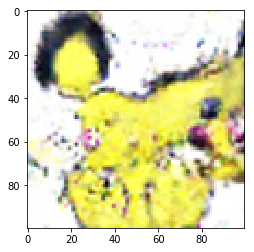

In [43]:
img = (generated_images[9]*127.5 + 127.5).astype('uint8')
img = cv2.resize(img, dsize=(100, 100), interpolation=cv2.INTER_CUBIC)
plt.imshow(img)